In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
# Load data from Excel
file_path = 'Book2.xlsx'  # Replace with your Excel file path
data = pd.read_excel(file_path)

# Display the first few rows to confirm
print("Data Loaded:")
print(data.head())

Data Loaded:
      Year  Policies_Issued  First_Year_Premium  Renewal_Premium  \
0  2013-14           291.77           115507.81        451524.01   
1  2014-15           260.17           113327.94        239667.65   
2  2015-16           267.38           138657.31        267818.42   
3  2016-17           264.56           175021.89        301720.23   
4  2017-18           281.97           194153.90        264655.54   

   Total_Premium  Claims_Ratio  Persistency_Ratio  Grievances_Reported  \
0      829929.46         70.22               84.8               123230   
1      328101.14         99.07               56.0               305996   
2      366943.23         98.33               61.0               269777   
3      418476.62         98.50               67.0               223048   
4      458809.44         80.71               84.8               223048   

   Grievances_Resolved  UBFPs_Reported  Loss_Due_To_Misselling  
0               122772           16834                    3584  
1  

In [8]:
# Validate required columns
required_columns = [
    'Year', 'Policies_Issued', 'First_Year_Premium', 'Renewal_Premium',
    'Total_Premium', 'Claims_Ratio', 'Persistency_Ratio',
    'Grievances_Reported', 'Grievances_Resolved', 'UBFPs_Reported',
    'Loss_Due_To_Misselling'
]

if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input Excel file must contain the following columns: {', '.join(required_columns)}")

# Separate features and target variable
X = data.drop(['Year', 'Loss_Due_To_Misselling'], axis=1)
y = data['Loss_Due_To_Misselling']

In [9]:
# Check for missing values
if X.isnull().any().any():
    X.fillna(X.mean(), inplace=True)  # Filling missing values with the mean

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the RandomForest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared Score: {r2_rf}")

Random Forest - Mean Squared Error: 30974.12499999999
Random Forest - R-squared Score: 0.8610627040944487


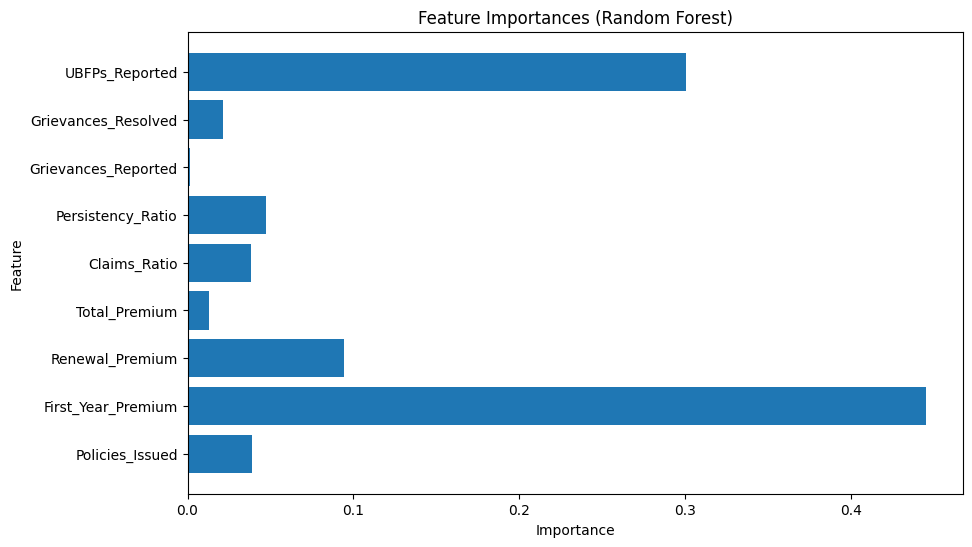

In [11]:
# Plot feature importances from Random Forest
plt.figure(figsize=(10, 6))
feature_importances = rf_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [12]:
# Function to predict using new input
def predict_new_input(new_data):
    """
    Predict the Loss Due to Mis-selling for new input data using the trained Random Forest model.

    :param new_data: DataFrame or dictionary with the same structure as the original input data (excluding target column).
    :return: Predicted value for Loss Due to Mis-selling.
    """
    # If new_data is a dictionary, convert it to DataFrame
    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])

    # Preprocess and scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Predict using the trained model
    predicted_loss = rf_model.predict(new_data_scaled)

    return predicted_loss[0]  # Return the first prediction (assuming a single input)

In [16]:
# Example usage of predict_new_input function:
#300, 120000, 470000, 850000, 68, 85, 120000, 119500, 16000
new_input_data = {
    'Policies_Issued': 300,
    'First_Year_Premium': 120000,
    'Renewal_Premium': 470000,
    'Total_Premium': 850000,
    'Claims_Ratio': 68,
    'Persistency_Ratio': 85,
    'Grievances_Reported': 120000,
    'Grievances_Resolved': 119500,
    'UBFPs_Reported': 16000
}
predicted_loss = predict_new_input(new_input_data)
print(f"Predicted Loss Due to Mis-selling for the new input: ₹ {predicted_loss:.2f} crore")

Predicted Loss Due to Mis-selling for the new input: ₹ 3951.59 crore


In [15]:
# Function to print derived formula based on feature importances
def print_derived_formula():
    """
    Prints a simplified derived formula using feature importances from the trained Random Forest model.
    This function assumes that the Random Forest model's feature importances are used to estimate
    how each feature contributes to predicting the target variable.
    """
    print("\nDerived Formula Based on Feature Importances (Random Forest):")
    print(f"Loss_Due_To_Misselling = {rf_model.intercept_ if hasattr(rf_model, 'intercept_') else 0:.4f}")  # Placeholder for intercept
    for feature, importance in zip(X.columns, feature_importances):
        print(f" + ({importance:.4f}) * {feature}")

# Call the function to print the derived formula
print_derived_formula()


Derived Formula Based on Feature Importances (Random Forest):
Loss_Due_To_Misselling = 0.0000
 + (0.0390) * Policies_Issued
 + (0.4449) * First_Year_Premium
 + (0.0942) * Renewal_Premium
 + (0.0132) * Total_Premium
 + (0.0380) * Claims_Ratio
 + (0.0474) * Persistency_Ratio
 + (0.0016) * Grievances_Reported
 + (0.0215) * Grievances_Resolved
 + (0.3003) * UBFPs_Reported
